In [1]:
### Imports

import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Notes ####
 
### The instructions have been taken from Udacity's course final project.
### Source: https://docs.google.com/document/u/1/d/1aCquhIqsUApgsxQ8-SQBAigFDcfWVVohLEXcV6jWbdI/pub?embedded=True
### You can enroll on the free course here: https://www.udacity.com/course/ab-testing--ud257

## Final Project - Instructions

### <u>Experiment Overview:</u> Free Trial Screener
At the time of this experiment, Udacity courses currently have two options on the course overview page: "start free trial", and "access course materials". If the student clicks "start free trial", they will be asked to enter their credit card information, and then they will be enrolled in a free trial for the paid version of the course. After 14 days, they will automatically be charged unless they cancel first. If the student clicks "access course materials", they will be able to view the videos and take the quizzes for free, but they will not receive coaching support or a verified certificate, and they will not submit their final project for feedback.


In the experiment, Udacity tested a change where if the student clicked "start free trial", they were asked how much time they had available to devote to the course. If the student indicated 5 or more hours per week, they would be taken through the checkout process as usual. If they indicated fewer than 5 hours per week, a message would appear indicating that Udacity courses usually require a greater time commitment for successful completion, and suggesting that the student might like to access the course materials for free. At this point, the student would have the option to continue enrolling in the free trial, or access the course materials for free instead. [This](https://drive.google.com/file/d/0ByAfiG8HpNUMakVrS0s4cGN2TjQ/view) screenshot shows what the experiment looks like.

<b>The hypothesis was that this might set clearer expectations for students upfront, thus reducing the number of frustrated students who left the free trial because they didn't have enough time—without significantly reducing the number of students to continue past the free trial and eventually complete the course</b>. If this hypothesis held true, Udacity could improve the overall student experience and improve coaches' capacity to support students who are likely to complete the course.


The <u><b>unit of diversion is a cookie</b></u>, although if the student enrolls in the free trial, they are tracked by user-id from that point forward. The same user-id cannot enroll in the free trial twice. For users that do not enroll, their user-id is not tracked in the experiment, even if they were signed in when they visited the course overview page.

### <u>Metric Choice</u>
Which of the following metrics would you choose to measure for this experiment and why? For each metric you choose, indicate whether you would use it as an invariant metric or an evaluation metric. The practical significance boundary for each metric, that is, the difference that would have to be observed before that was a meaningful change for the business, is given in parentheses. All practical significance boundaries are given as absolute changes.


Any place "unique cookies" are mentioned, the uniqueness is determined by day. (That is, the same cookie visiting on different days would be counted twice.) User-ids are automatically unique since the site does not allow the same user-id to enroll twice.


<li><b>Number of cookies:</b> That is, number of unique cookies to view the course overview page. (dmin=3000)</li>
<li><b>Number of user-ids:</b> That is, number of users who enroll in the free trial. (dmin=50)</li>
<li><b>Number of clicks:</b> That is, number of unique cookies to click the "Start free trial" button (which happens before the free trial screener is trigger). (dmin=240)</li>
<li><b>Click-through-probability:</b> That is, number of unique cookies to click the "Start free trial" button divided by number of unique cookies to view the course overview page. (dmin=0.01)</li>
<li><b>Gross conversion:</b> That is, number of user-ids to complete checkout and enroll in the free trial divided by number of unique cookies to click the "Start free trial" button. (dmin= 0.01)</li>
<li><b>Retention:</b> That is, number of user-ids to remain enrolled past the 14-day boundary (and thus make at least one payment) divided by number of user-ids to complete checkout. (dmin=0.01)</li>  
<li><b>Net conversion:</b> That is, number of user-ids to remain enrolled past the 14-day boundary (and thus make at least one payment) divided by the number of unique cookies to click the "Start free trial" button. (dmin= 0.0075)  </li>  
<p>&nbsp;</p>
You should also decide now what results you will be looking for in order to launch the experiment. Would a change in any one of your evaluation metrics be sufficient? Would you want to see multiple metrics all move or not move at the same time in order to launch? This decision will inform your choices while designing the experiment.

### <u>Measuring Variability
[This spreadsheet](https://www.google.com/url?q=https://docs.google.com/a/knowlabs.com/spreadsheets/d/1MYNUtC47Pg8hdoCjOXaHqF-thheGpUshrFA21BAJnNc/edit%23gid%3D0&sa=D&source=editors&ust=1613433562531000&usg=AOvVaw0IyRBmLFgO_de8Ye7ay_QE) contains rough estimates of the baseline values for these metrics (again, these numbers have been changed from Udacity's true numbers).


For each metric you selected as an evaluation metric, estimate its standard deviation analytically. Do you expect the analytic estimates to be accurate? That is, for which metrics, if any, would you want to collect an empirical estimate of the variability if you had time? <u>(Given 5.000 cookies)</u>

| Baseline metric                                      	| Value     	|   	|   	|   	|
|------------------------------------------------------	|-----------	|---	|---	|---	|
| Unique cookies to view course overview page per day: 	|     40000 	|   	|   	|   	|
| Unique cookies to click "Start free trial" per day:  	|      3200 	|   	|   	|   	|
| Enrollments per day:                                 	|       660 	|   	|   	|   	|
| Click-through-probability on "Start free trial":     	|      0.08 	|   	|   	|   	|
| Probability of enrolling, given click:               	|   0.20625 	|   	|   	|   	|
| Probability of payment, given enroll:                	|      0.53 	|   	|   	|   	|
| Probability of payment, given click                  	| 0.1093125 	|   	|   	|   	|

In [2]:
### Assigning variables to the given data

daily_unique_cookies = 40000
daily_click_start_free_trial = 3200
click_through_probability_start_free_trial = daily_click_start_free_trial / daily_unique_cookies
daily_enrollments = 660
enrolling_probability_per_click = daily_enrollments / daily_click_start_free_trial
payment_probability_per_enrollment = .53
payment_probability_per_click = .1093125

In [3]:
### Gross Conversion

N = 5000 * click_through_probability_start_free_trial
gross_conversion_p_hat = daily_enrollments / daily_click_start_free_trial
gross_conversion_std = np.sqrt(gross_conversion_p_hat * (1-gross_conversion_p_hat) / N)
round(gross_conversion_std, 4)

### The unit of diversion is the same as the unit of measurement, hence the analytical standard deviation is a good
### aproximation.

0.0202

In [4]:
### Retention

N = 5000 * enrolling_probability_per_click * click_through_probability_start_free_trial
retention_p_hat = payment_probability_per_enrollment
retention_std = np.sqrt(retention_p_hat * (1-retention_p_hat) / N)
round(retention_std, 4)

### In this case, the unit of diversion and the unit of measurement differ, so it's most likely that the analytical
### standard deviation is underestimated.

0.0549

In [5]:
### Net Conversion

N = 5000 * click_through_probability_start_free_trial
net_conversion_p_hat = payment_probability_per_click
net_conversion_std = np.sqrt(net_conversion_p_hat * (1-net_conversion_p_hat) / N)
round(net_conversion_std, 4)

### The unit of diversion is the same as the unit of measurement, hence the analytical standard deviation is a good
### aproximation

0.0156

### <u>Sizing
#### Choosing Number of Samples given Power
Using the analytic estimates of variance, how many pageviews total (across both groups) would you need to collect to adequately power the experiment? Use an alpha of 0.05 and a beta of 0.2. Make sure you have enough power for each metric.

In [6]:
### Assigning variables to the given data

alpha = .05
beta = .2
power = 1 - beta

gross_conversion_baseline = enrolling_probability_per_click
gross_conversion_dmin = gross_conversion_baseline + .01

retention_baseline = payment_probability_per_enrollment
retention_dmin = retention_baseline + .01

net_conversion_baseline = payment_probability_per_click
net_conversion_dmin = net_conversion_baseline + .0075

In [7]:
### The next formula will calculate the needed sample size per branch, given the baseline metric, the dmin, alpha and beta
### source: https://stats.stackexchange.com/questions/392979/ab-test-sample-size-calculation-by-hand

def ab_test_size(baseline, dmin, alpha, beta):
    alpha_z_score = stats.norm.ppf(alpha / 2)
    beta_z_score = stats.norm.ppf(beta)
    n = (alpha_z_score * np.sqrt(baseline * (1 - baseline) * 2)
         + beta_z_score * np.sqrt(baseline * (1 - baseline) + dmin * (1 - dmin))) ** 2 / np.abs(
        dmin - baseline) ** 2
    return n

In [8]:
### We apply the formula to the different evaluation metrics

gross_conversion_size = ab_test_size(gross_conversion_baseline, gross_conversion_dmin, .05, .2) * 40000/3200 * 2
gross_conversion_size

645867.5001870217

In [9]:
retention_size = ab_test_size(retention_baseline, retention_dmin, .05, .2)  * 40000/660 * 2
retention_size

4737770.868173585

In [10]:
net_conversion_size = ab_test_size(net_conversion_baseline, net_conversion_dmin, .05, .2) * 40000/3200 * 2
net_conversion_size

685333.4474090892

#### Choosing Duration vs. Exposure
What percentage of Udacity's traffic would you divert to this experiment (assuming there were no other experiments you wanted to run simultaneously)? Is the change risky enough that you wouldn't want to run on all traffic?


Given the percentage you chose, how long would the experiment take to run, using the analytic estimates of variance? If the answer is longer than a few weeks, then this is unreasonably long, and you should reconsider an earlier decision.

In [11]:
### Given the total number of pageviews needed to run the test and the average unique cookies that visit the page, 
### we'll be testing the whole range of possibilities for the exposure, in order to calculate the possible durations
### of the test.

durations = []
for i in np.arange(0.1, 1, .01):
    duration = retention_size/40000/i
    durations.append(duration)
    
print('Duration Min: ', np.min(durations))
print('Duration Mean: ', np.mean(durations))
print('Duration Max: ', np.max(durations))

Duration Min:  119.640678489232
Duration Mean:  309.06180544364395
Duration Max:  1184.4427170433962


In [12]:
### We'll try the same formula used before to test the possible durations of the redesigned test, this time using
### the Net Conversion needed sample size.

durations = []
exposure = []
for i in np.arange(0.1, 1, .01):
    duration = net_conversion_size/40000/i
    durations.append(duration)
    exposure.append(i)
    
print('Duration Min: ', np.min(durations))
print('Duration Mean: ', np.mean(durations))
print('Duration Max: ', np.max(durations))

Duration Min:  17.30640018709822
Duration Mean:  44.706761572203845
Duration Max:  171.33336185227228


In [13]:
def find_nearest(array, value):
    array = np.asarray(array)
    index = (np.abs(array - value)).argmin()
    return index

thirty_day_index = find_nearest(durations, 30)
print('Selected Exposure Level for a 30-day test:', exposure[thirty_day_index].round(2))

Selected Exposure Level for a 30-day test: 0.57


### <u>Analysis
The data for you to analyze is [here](https://www.google.com/url?q=https://docs.google.com/a/knowlabs.com/spreadsheets/d/1Mu5u9GrybDdska-ljPXyBjTpdZIUev_6i7t4LRDfXM8/edit%23gid%3D0&sa=D&source=editors&ust=1613433562533000&usg=AOvVaw3Aw2DobCRD_zuiZyuaseD2). This data contains the raw information needed to compute the above metrics, broken down day by day. Note that there are two sheets within the spreadsheet - one for the experiment group, and one for the control group.


The meaning of each column is:

<li>Pageviews: Number of unique cookies to view the course overview page that day.</li>
<li>Clicks: Number of unique cookies to click the course overview page that day.</li>
<li>Enrollments: Number of user-ids to enroll in the free trial that day.</li>
<li>Payments: Number of user-ids who who enrolled on that day to remain enrolled for 14 days and thus make a payment. (Note that the date for this column is the start date, that is, the date of enrollment, rather than the date of the payment. The payment happened 14 days later. Because of this, the enrollments and payments are tracked for 14 fewer days than the other columns.)</li>

In [14]:
### Loading the data

data_control = pd.read_csv('data/Final Project Results - Control.csv', sep = ';')
data_experiment = pd.read_csv('data/Final Project Results - Experiment.csv', sep = ';')
display(data_control.head())
display(data_experiment.head())

,Date,Pageviews,Clicks,Enrollments,Payments
0,"Sat, Oct 11",7723.0,687.0,134.0,70.0
1,"Sun, Oct 12",9102.0,779.0,147.0,70.0
2,"Mon, Oct 13",10511.0,909.0,167.0,95.0
3,"Tue, Oct 14",9871.0,836.0,156.0,105.0
4,"Wed, Oct 15",10014.0,837.0,163.0,64.0


,Date,Pageviews,Clicks,Enrollments,Payments
0,"Sat, Oct 11",7716,686,105.0,34.0
1,"Sun, Oct 12",9288,785,116.0,91.0
2,"Mon, Oct 13",10480,884,145.0,79.0
3,"Tue, Oct 14",9867,827,138.0,92.0
4,"Wed, Oct 15",9793,832,140.0,94.0


#### Sanity Checks
Start by checking whether your invariant metrics are equivalent between the two groups. If the invariant metric is a simple count that should be randomly split between the 2 groups, you can use a binomial test as demonstrated in Lesson 5. Otherwise, you will need to construct a confidence interval for a difference in proportions using a similar strategy as in Lesson 1, then check whether the difference between group values falls within that confidence level.


If your sanity checks fail, look at the day by day data and see if you can offer any insight into what is causing the problem.

##### Invariant Metric N° 1: Pageviews

In [15]:
control_pageviews_count = data_control['Pageviews'].sum()
control_pageviews_mean = data_control['Pageviews'].mean()
control_pageviews_std = data_control['Pageviews'].std()

print('Control - Total pageviews: ', control_pageviews_count)
print('Control - Daily pageviews mean: ', control_pageviews_mean)
print('Control - Daily pageviews std: ', control_pageviews_std)

Control - Total pageviews:  345543.0
Control - Daily pageviews mean:  9339.0
Control - Daily pageviews std:  740.2395633246788


In [16]:
experiment_pageviews_count = data_experiment['Pageviews'].sum()
experiment_pageviews_mean = data_experiment['Pageviews'].mean()
experiment_pageviews_std = data_experiment['Pageviews'].std()

print('Experiment - Total pageviews: ', experiment_pageviews_count)
print('Experiment - Daily pageviews mean: ', experiment_pageviews_mean)
print('Experiment - Daily pageviews std: ', experiment_pageviews_std)

Experiment - Total pageviews:  344660
Experiment - Daily pageviews mean:  9315.135135135135
Experiment - Daily pageviews std:  708.0707812296956


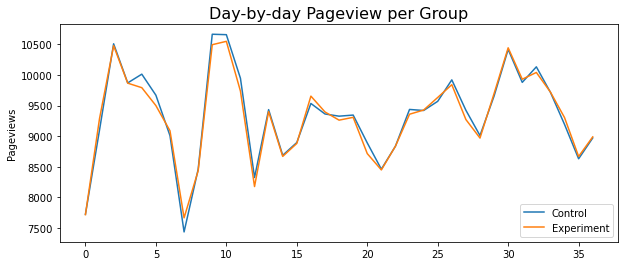

In [17]:
plt.figure(figsize = [10,4])
control = sns.lineplot(y = data_control['Pageviews'], x = data_control.index)
experiment = sns.lineplot(y = data_experiment['Pageviews'], x = data_experiment.index)
plt.title('Day-by-day Pageview per Group', fontsize = 16)
plt.legend(['Control', 'Experiment'], loc = 'lower right')
plt.show()

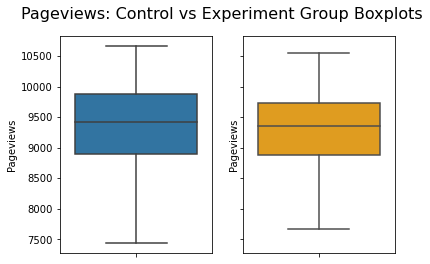

In [18]:
fig, axs = plt.subplots(1, 2, sharey = True)
fig.suptitle('Pageviews: Control vs Experiment Group Boxplots', fontsize = 16)
sns.boxplot(y = data_control['Pageviews'], ax= axs[0])
sns.boxplot(y = data_experiment['Pageviews'], ax= axs[1], color = 'orange')
plt.show()

In [19]:
### To check the statistical significance for the difference, we consider a .5 probability for ending in each group,
### that is a 1/2 chance of being part of the test or the control group. We'll check if the proportion for the control
### group falls into the confidence interval for a .05 alpha.

p_hat = .5
std = np.sqrt(.5 * .5)
alpha = .05

me = np.abs(stats.norm.ppf(alpha/2)) * std / np.sqrt((control_pageviews_count+experiment_pageviews_count))
lower_thresh = p_hat - me
upper_thesh = p_hat + me
observed_value = control_pageviews_count / (control_pageviews_count + experiment_pageviews_count)

print('Lower Threshold: ', lower_thresh.round(4))
print('Upper Threshold: ', upper_thesh.round(4))
print('Observed Value: ', observed_value.round(4))

if observed_value < lower_thresh or observed_value > upper_thesh:
    print('The difference between groups is statistically significant at a 95% confidence level')
else:
    print('The difference between groups is not statistically significant at a 95% confidence level')

Lower Threshold:  0.4988
Upper Threshold:  0.5012
Observed Value:  0.5006
The difference between groups is not statistically significant at a 95% confidence level


##### Invariant Metric N° 2: Clicks

In [20]:
control_clicks_count = data_control['Clicks'].sum()
control_clicks_mean = data_control['Clicks'].mean()
control_clicks_std = data_control['Clicks'].std()

print('Control - Total pageviews: ', control_clicks_count)
print('Control - Daily pageviews mean: ', control_clicks_mean)
print('Control - Daily pageviews std: ', control_clicks_std)

Control - Total pageviews:  28378.0
Control - Daily pageviews mean:  766.972972972973
Control - Daily pageviews std:  68.2867672582513


In [21]:
experiment_clicks_count = data_experiment['Clicks'].sum()
experiment_clicks_mean = data_experiment['Clicks'].mean()
experiment_clicks_std = data_experiment['Clicks'].std()

print('Experiment - Total pageviews: ', experiment_clicks_count)
print('Experiment - Daily pageviews mean: ', experiment_clicks_mean)
print('Experiment - Daily pageviews std: ', experiment_clicks_std)

Experiment - Total pageviews:  28325
Experiment - Daily pageviews mean:  765.5405405405405
Experiment - Daily pageviews std:  64.57837382875452


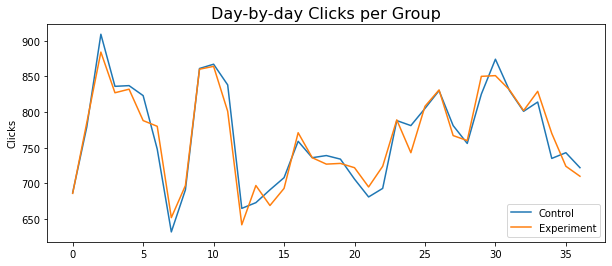

In [22]:
plt.figure(figsize = [10,4])
control = sns.lineplot(y = data_control['Clicks'], x = data_control.index)
experiment = sns.lineplot(y = data_experiment['Clicks'], x = data_experiment.index)
plt.title('Day-by-day Clicks per Group', fontsize = 16)
plt.legend(['Control', 'Experiment'], loc = 'lower right')
plt.show()

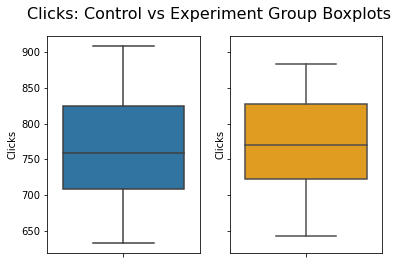

In [23]:
fig, axs = plt.subplots(1, 2, sharey = True)
fig.suptitle('Clicks: Control vs Experiment Group Boxplots', fontsize = 16)
sns.boxplot(y = data_control['Clicks'], ax= axs[0])
sns.boxplot(y = data_experiment['Clicks'], ax= axs[1], color = 'orange')
plt.show()

In [24]:
p_hat = .5
std = .5 * .5
alpha = .05

me = np.abs(stats.norm.ppf(alpha/2)) * np.sqrt(std / (control_clicks_count + experiment_clicks_count))
lower_thresh = p_hat - me
upper_thesh = p_hat + me
observed_value = control_clicks_count / (control_clicks_count + experiment_clicks_count)

print('Lower Threshold: ', lower_thresh.round(4))
print('Upper Threshold: ', upper_thesh.round(4))
print('Observed Value: ', observed_value.round(4))

if observed_value < lower_thresh or observed_value > upper_thesh:
    print('The difference between groups is statistically significant at a 95% confidence level')
else:
    print('The difference between groups is not statistically significant at a 95% confidence level')

Lower Threshold:  0.4959
Upper Threshold:  0.5041
Observed Value:  0.5005
The difference between groups is not statistically significant at a 95% confidence level


##### Invariant Metric N° 3: Click-through-probability

In [25]:
control_ctp_mean = data_control['Clicks'].sum()/data_control['Pageviews'].sum()
print('Control - Click-through-probability: ', control_ctp_mean)

Control - Click-through-probability:  0.08212581357457682


In [26]:
experiment_ctp_mean = data_experiment['Clicks'].sum()/data_experiment['Pageviews'].sum()
print('Experiment - Click-through-probability: ', experiment_ctp_mean)

Experiment - Click-through-probability:  0.08218244066616376


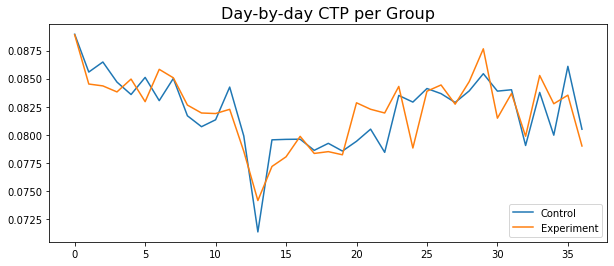

In [27]:
plt.figure(figsize = [10,4])
control = sns.lineplot(y = data_control['Clicks']/data_control['Pageviews'], x = data_control.index)
experiment = sns.lineplot(y = data_experiment['Clicks']/data_experiment['Pageviews'], x = data_experiment.index)
plt.title('Day-by-day CTP per Group', fontsize = 16)
plt.legend(['Control', 'Experiment'], loc = 'lower right')
plt.show()

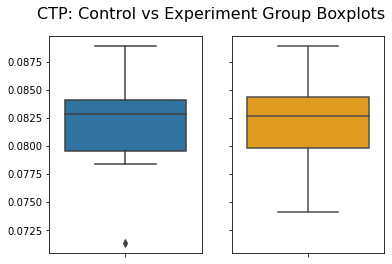

In [28]:
fig, axs = plt.subplots(1, 2, sharey = True)
fig.suptitle('CTP: Control vs Experiment Group Boxplots', fontsize = 16)
sns.boxplot(y = data_control['Clicks']/data_control['Pageviews'], ax= axs[0])
sns.boxplot(y = data_experiment['Clicks']/data_experiment['Pageviews'], ax= axs[1], color = 'orange')
plt.show()

In [29]:
### In this case, we have to run a difference in proportions test. So, we'll need to calculate de pooled p-hat, the pooled
### standard error, and compare de difference to the confidence interval around the zero value (no difference), with an
### alpha of .05.

pooled_p_hat = (control_clicks_count + experiment_clicks_count) / (
    control_pageviews_count + experiment_pageviews_count)
pooled_SE = np.sqrt(pooled_p_hat * (1 - pooled_p_hat) * (1 / control_pageviews_count + 1 / experiment_pageviews_count))
alpha = .05
d_hat = np.abs(experiment_ctp_mean - control_ctp_mean)

me = np.abs(stats.norm.ppf(alpha/2)) * pooled_SE
lower_thresh = 0 - me
upper_thesh = 0 + me

print('Lower Threshold: ', lower_thresh.round(4))
print('Upper Threshold: ', upper_thesh.round(4))
print('Observed Value: ', d_hat.round(4))

if d_hat < lower_thresh or d_hat > upper_thesh :
    print('The difference between groups is statistically significant at a 95% confidence level')
else:
    print('The difference between groups is not statistically significant at a 95% confidence level')

Lower Threshold:  -0.0013
Upper Threshold:  0.0013
Observed Value:  0.0001
The difference between groups is not statistically significant at a 95% confidence level


#### Check for Practical and Statistical Significance
Next, for your evaluation metrics, calculate a confidence interval for the difference between the experiment and control groups, and check whether each metric is statistically and/or practically significance. A metric is statistically significant if the confidence interval does not include 0 (that is, you can be confident there was a change), and it is practically significant if the confidence interval does not include the practical significance boundary (that is, you can be confident there is a change that matters to the business.)


If you have chosen multiple evaluation metrics, you will need to decide whether to use the Bonferroni correction. When deciding, keep in mind the results you are looking for in order to launch the experiment. Will the fact that you have multiple metrics make those results more likely to occur by chance than the alpha level of 0.05?



In [30]:
### First, we drop the empty rows in the control group dataframe.

reduced_data_control = data_control.dropna(axis = 0, how = 'any', subset = ['Enrollments', 'Payments'])
print(data_control.shape)
print(reduced_data_control.shape)

(39, 5)
(23, 5)


In [31]:
### Same for the experiment group.

reduced_data_experiment = data_experiment.dropna(axis = 0, how = 'any', subset = ['Enrollments', 'Payments'])
print(data_experiment.shape)
print(reduced_data_experiment.shape)

(37, 5)
(23, 5)


##### Evaluation Metric N° 1: Gross Conversion

In [32]:
### We calculate the mean value for the control group

control_gconv_count = reduced_data_control['Clicks'].sum()
control_gconv_mean = reduced_data_control['Enrollments'].sum()/reduced_data_control['Clicks'].sum()
control_gconv_series = reduced_data_control['Enrollments']/reduced_data_control['Clicks']
print(control_gconv_mean)

0.2188746891805933


In [33]:
### Same for the experiment group.

experiment_gconv_count = reduced_data_experiment['Clicks'].sum()
experiment_gconv_mean = reduced_data_experiment['Enrollments'].sum()/reduced_data_experiment['Clicks'].sum()
experiment_gconv_series = reduced_data_experiment['Enrollments']/reduced_data_experiment['Clicks']
print(experiment_gconv_mean)

0.19831981460023174


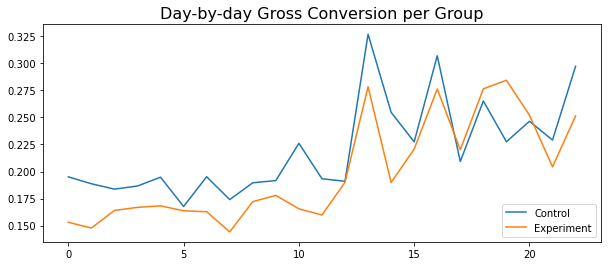

In [34]:
plt.figure(figsize = [10,4])
control = sns.lineplot(y = control_gconv_series, x= reduced_data_control.index)
experiment = sns.lineplot(y = experiment_gconv_series, x= reduced_data_experiment.index)
plt.title('Day-by-day Gross Conversion per Group', fontsize = 16)
plt.legend(['Control', 'Experiment'], loc = 'lower right')
plt.show()

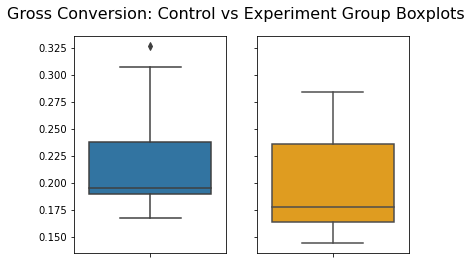

In [35]:
fig, axs = plt.subplots(1, 2, sharey = True)
fig.suptitle('Gross Conversion: Control vs Experiment Group Boxplots', fontsize = 16)
sns.boxplot(y = control_gconv_series, ax= axs[0])
sns.boxplot(y = experiment_gconv_series, ax= axs[1], color = 'orange')
plt.show()

C:\Users\juan.ron\Anaconda3\envs\dhdsblend\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\juan.ron\Anaconda3\envs\dhdsblend\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


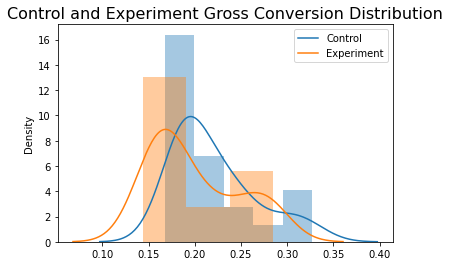

In [36]:
plt.figure
plt.title('Control and Experiment Gross Conversion Distribution', fontsize = 16)
sns.distplot(control_gconv_series)
sns.distplot(experiment_gconv_series)
plt.legend(['Control', 'Experiment'])
plt.show()

In [37]:
### Now we have to test if the difference between groups is statistically significant, so we're running
### a z-test with an .05 alpha. In order to do that, we calculate the pooled p-hat and standard error.
### Since the change on the metric also has to be practically significant, we have to consider the d-min. That is
### the minimum amount of change in the metric that business requires to run the tested changes.

gc_pooled_p_hat = (reduced_data_control['Enrollments'].sum() + reduced_data_experiment['Enrollments'].sum()) / (
    control_gconv_count + experiment_gconv_count)
gc_pooled_SE = np.sqrt(gc_pooled_p_hat * (1- gc_pooled_p_hat) * (1 / control_gconv_count + 1/ experiment_gconv_count))
alpha = .05
z = np.abs(stats.norm.ppf(alpha / 2))
gc_me = z * gc_pooled_SE
gc_dmin = -.01
gc_d_hat = experiment_gconv_mean - control_gconv_mean

gc_lower_thresh = gc_d_hat - gc_me
gc_upper_thresh = gc_d_hat + gc_me

print('Lower Threshold: ', gc_lower_thresh.round(4))
print('Upper Threshold: ', gc_upper_thresh.round(4))
print('Observed Value: ', gc_d_hat.round(4))
print('dmin: ', gc_dmin)

if gc_upper_thresh > 0:
    print('The observed change is not statistically significant at a 95% confidence level.')
elif gc_upper_thresh > gc_dmin:
    print('The observed change is not practically significant at a 95% confidence level.')
else:
    print('The observed change is both practically and statistically significant at a 95% confidence level.')

Lower Threshold:  -0.0291
Upper Threshold:  -0.012
Observed Value:  -0.0206
dmin:  -0.01
The observed change is both practically and statistically significant at a 95% confidence level.


##### Evaluation Metric N° 2: Net Conversion

In [38]:
control_nconv_count = reduced_data_control['Clicks'].sum()
control_nconv_mean = reduced_data_control['Payments'].sum()/reduced_data_control['Clicks'].sum()
control_nconv_series = reduced_data_control['Payments']/reduced_data_control['Clicks']
print(control_nconv_mean)

0.11756201931417337


In [39]:
experiment_nconv_count = reduced_data_experiment['Clicks'].sum()
experiment_nconv_mean = reduced_data_experiment['Payments'].sum()/reduced_data_experiment['Clicks'].sum()
experiment_nconv_series = reduced_data_experiment['Payments']/reduced_data_experiment['Clicks']
print(experiment_nconv_mean)

0.1126882966396292


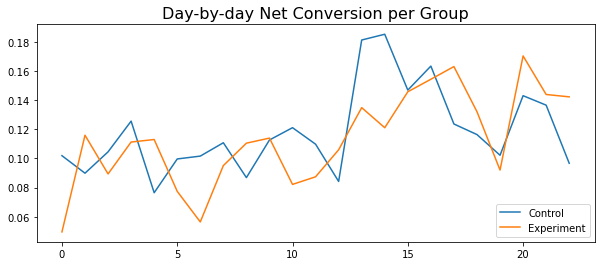

In [40]:
plt.figure(figsize = [10,4])
control = sns.lineplot(y = control_nconv_series, x= reduced_data_control.index)
experiment = sns.lineplot(y = experiment_nconv_series, x= reduced_data_experiment.index)
plt.title('Day-by-day Net Conversion per Group', fontsize = 16)
plt.legend(['Control', 'Experiment'], loc = 'lower right')
plt.show()

[]

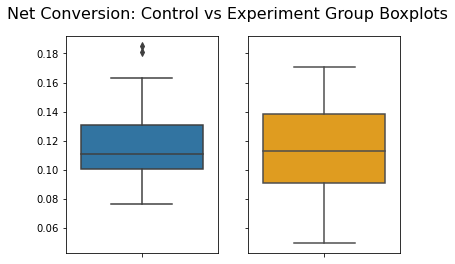

In [41]:
fig, axs = plt.subplots(1, 2, sharey = True)
fig.suptitle('Net Conversion: Control vs Experiment Group Boxplots', fontsize = 16)
sns.boxplot(y = control_nconv_series, ax= axs[0])
sns.boxplot(y = experiment_nconv_series, ax= axs[1], color = 'orange')
plt.plot()

C:\Users\juan.ron\Anaconda3\envs\dhdsblend\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\juan.ron\Anaconda3\envs\dhdsblend\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


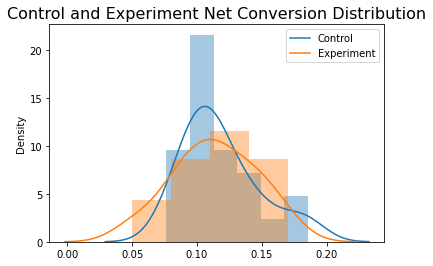

In [42]:
plt.figure
plt.title('Control and Experiment Net Conversion Distribution', fontsize = 16)
sns.distplot(control_nconv_series)
sns.distplot(experiment_nconv_series)
plt.legend(['Control', 'Experiment'])
plt.show()

In [43]:
nc_pooled_p_hat = (reduced_data_control['Payments'].sum() + reduced_data_experiment['Payments'].sum()) / (
    control_nconv_count + experiment_nconv_count)
nc_pooled_SE = np.sqrt(nc_pooled_p_hat * (1- nc_pooled_p_hat) * (1 / control_nconv_count + 1/ experiment_nconv_count))

alpha = .05
z = np.abs(stats.norm.ppf(alpha / 2))
nc_me = z * nc_pooled_SE
nc_dmin = -.0075
nc_d_hat = experiment_nconv_mean - control_nconv_mean

nc_lower_thresh = nc_d_hat - nc_me
nc_upper_thresh = nc_d_hat + nc_me

print('Lower Threshold: ', nc_lower_thresh.round(4))
print('Upper Threshold: ', nc_upper_thresh.round(4))
print('Observed Value: ', nc_d_hat.round(4))
print('dmin: ', nc_dmin)

if nc_upper_thresh > 0:
    print('The observed change is not statistically significant at a 95% confidence level.')
elif nc_upper_thresh > dmin:
    print('The observed change is not practically significant at a 95% confidence level.')
else:
    print('The observed change is both practically and statistically significant at a 95% confidence level.')

Lower Threshold:  -0.0116
Upper Threshold:  0.0019
Observed Value:  -0.0049
dmin:  -0.0075
The observed change is not statistically significant at a 95% confidence level.


#### Run Sign Tests
For each evaluation metric, do a sign test using the day-by-day breakdown. If the sign test does not agree with the confidence interval for the difference, see if you can figure out why.

In [44]:
### The sign test consists on checking the day-by-day differences, and counting how many days the metric
### from the control group was bigger than the metric from the test group. In order to do that we have to merge
### both dataframes into a single one.

reduced_data_control_join = reduced_data_control.set_index('Date')
reduced_data_experiment_join = reduced_data_experiment.set_index('Date')
sign_test_data = reduced_data_control_join.join(reduced_data_experiment_join,
                                                lsuffix = '_Control',
                                                rsuffix = '_Experiment')
sign_test_data = sign_test_data.reset_index()

sign_test_data['Gross_Conversion_Control']= sign_test_data['Enrollments_Control'] / sign_test_data['Clicks_Control']
sign_test_data['Gross_Conversion_Experiment']= sign_test_data['Enrollments_Experiment'] / sign_test_data['Clicks_Experiment']

sign_test_data['Net_Conversion_Control']= sign_test_data['Payments_Control'] / sign_test_data['Clicks_Control']
sign_test_data['Net_Conversion_Experiment']= sign_test_data['Payments_Experiment'] / sign_test_data['Clicks_Experiment']

In [45]:
### Now that we have a single dataframe with all the information, we create a new column that returns a 'True' statement
### when the Gross Conversion from the control group is bigger than the one from the test group, and repeat the same
### for the Net Conversion metric.

sign_test_data['Gross_Conversion_Sign'] = sign_test_data['Gross_Conversion_Control'] > sign_test_data[
    'Gross_Conversion_Experiment']
sign_test_data['Net_Conversion_Sign'] = sign_test_data['Net_Conversion_Control'] > sign_test_data[
    'Net_Conversion_Experiment']

##### Evaluation Metric N° 1: Gross Conversion

In [46]:
### The next step in the sign test is checking how likely it is to get such a result. Given that there are two
### possibilities - it is either True or Negative - we do that with a binomial test.

gc_p = sign_test_data['Gross_Conversion_Sign'].sum() / sign_test_data.shape[0]
print('Gross Conversion - Positive Experiment Sign: ', sign_test_data['Gross_Conversion_Sign'].sum())
print('Gross Conversion - Total Cases: ', sign_test_data.shape[0])
print('Gross Conversion - Experiment p_hat: ', gc_p)

Gross Conversion - Positive Experiment Sign:  19
Gross Conversion - Total Cases:  23
Gross Conversion - Experiment p_hat:  0.8260869565217391


In [47]:
### For the binomial test we use an specific function within the Scipy library.

gc_p_value = stats.binom_test(19, 23, .5).round(4)
print('Gross Conversion sign test p-value: ', gc_p_value)

Gross Conversion sign test p-value:  0.0026


##### Evaluation Metric N° 2: Net Conversion

In [48]:
nc_p = sign_test_data['Net_Conversion_Sign'].sum() / sign_test_data.shape[0]
print('Net Conversion - Positive Experiment Sign: ', sign_test_data['Net_Conversion_Sign'].sum())
print('Net Conversion - Total Cases: ', sign_test_data.shape[0])
print('Net Conversion - Experiment p_hat: ', nc_p)

Net Conversion - Positive Experiment Sign:  13
Net Conversion - Total Cases:  23
Net Conversion - Experiment p_hat:  0.5652173913043478


In [49]:
nc_p_value = stats.binom_test(13, 23, .5).round(4)
print('Net Conversion sign test p-value: ', nc_p_value)

Net Conversion sign test p-value:  0.6776


#### Make a Recommendation
Finally, make a recommendation. Would you launch this experiment, not launch it, dig deeper, run a follow-up experiment, or is it a judgment call? If you would dig deeper, explain what area you would investigate. If you would run follow-up experiments, briefIy describe that experiment. If it is a judgment call, explain what factors would be relevant to the decision.